In [2]:
import pandas as pd

data = pd.read_csv('/Housing.csv')
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
print(data.isna().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


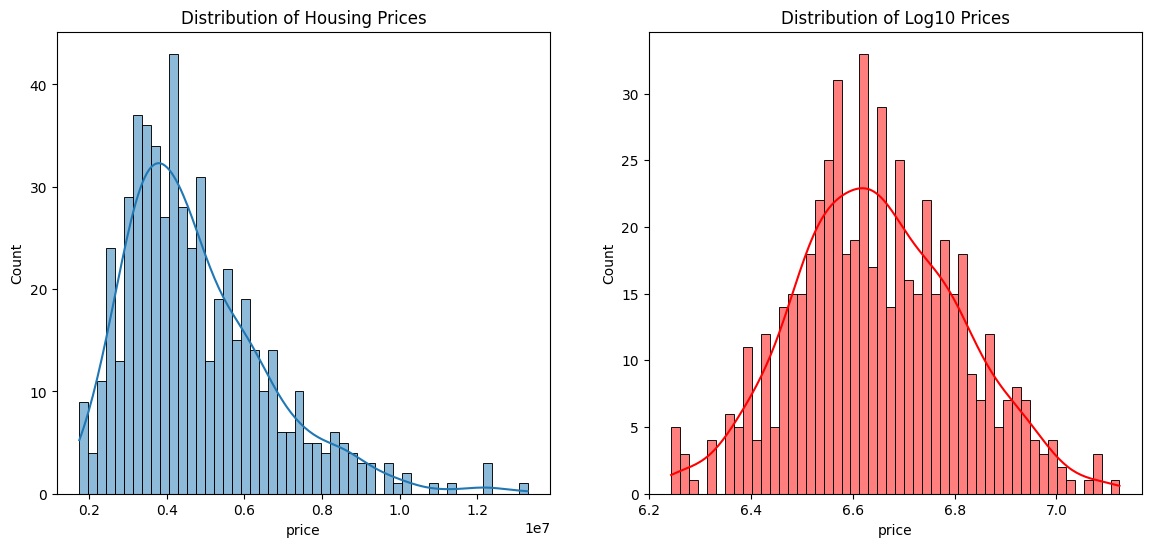

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribution of Housing Prices")

plt.subplot(1, 2, 2)
sns.histplot(np.log10(data['price']), bins=50, color='red', kde=True)
plt.title("Distribution of Log10 Prices")

plt.show()


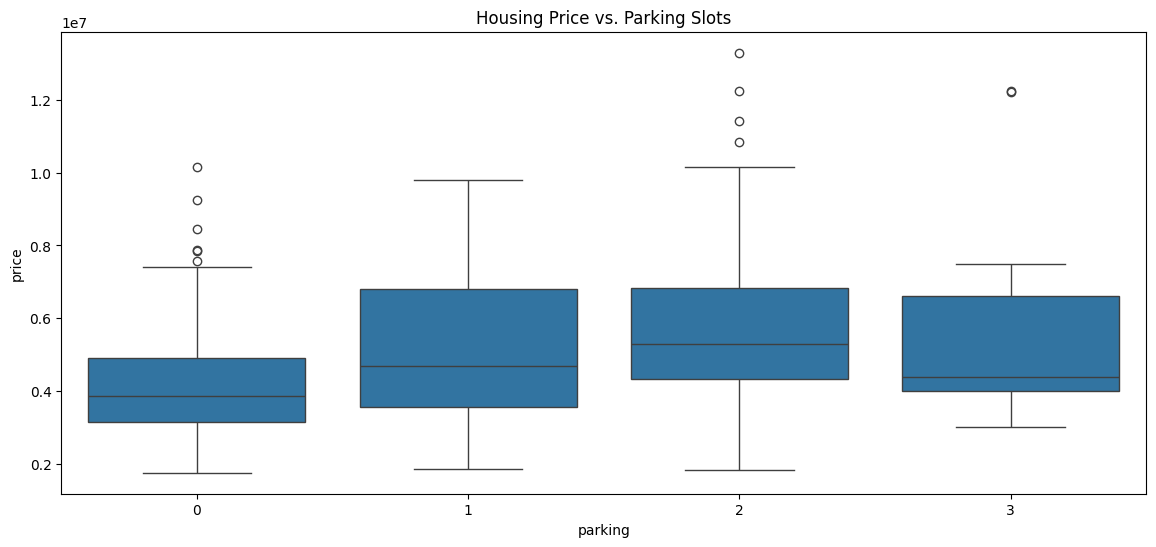

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='parking', y='price', data=data)
plt.title('Housing Price vs. Parking Slots')
plt.show()


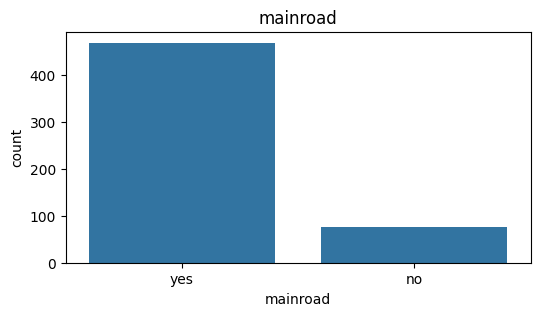

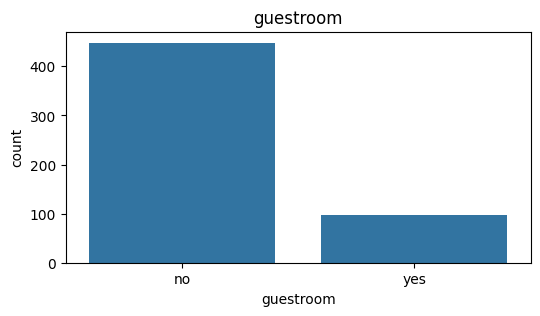

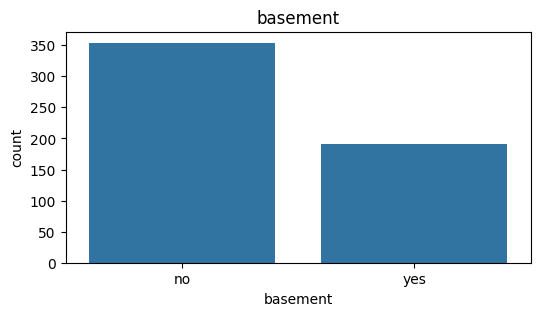

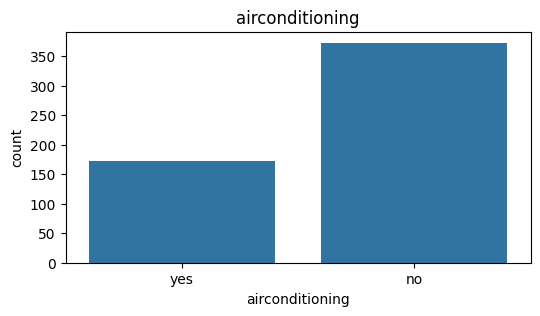

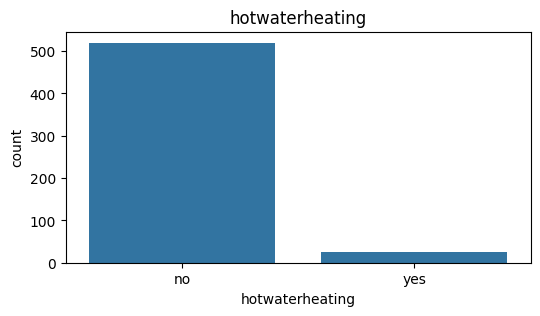

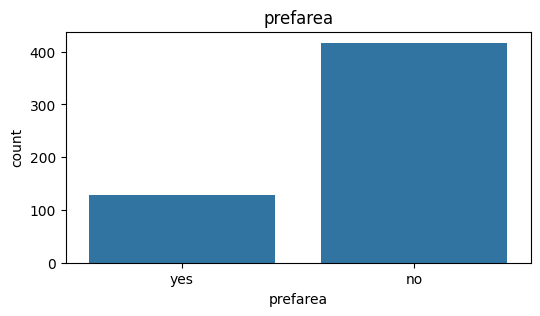

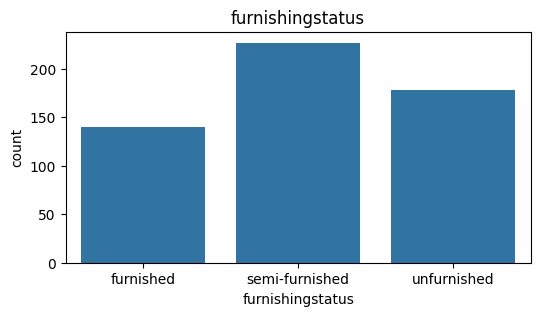

In [6]:
cols = ['mainroad','guestroom','basement','airconditioning','hotwaterheating','prefarea','furnishingstatus']
for col in cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.show()


In [7]:
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})


In [8]:
data_encoded = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)


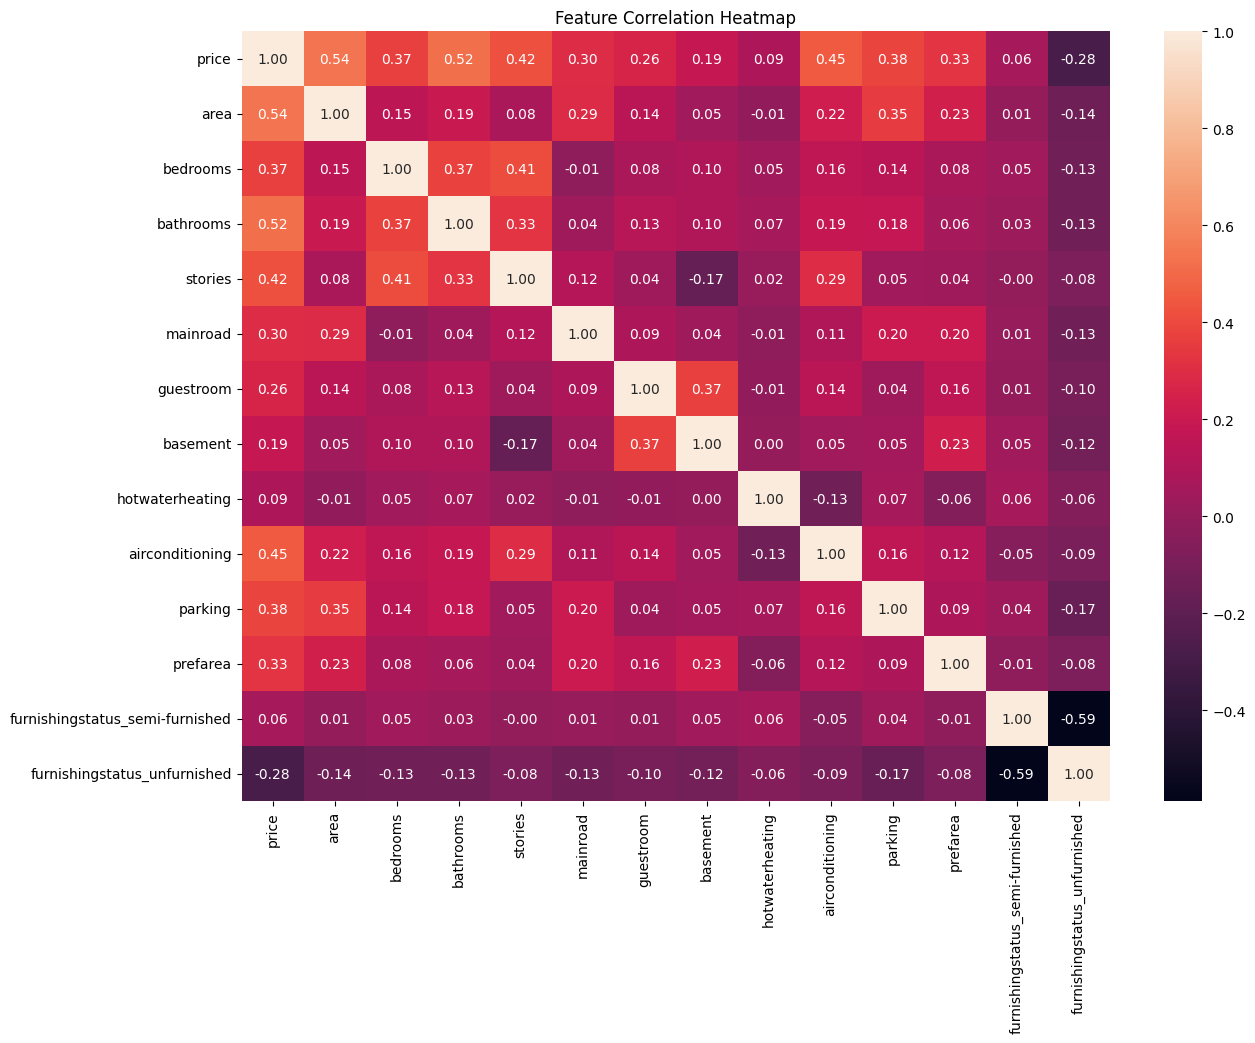

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


We explored a housing prices dataset to understand what really affects the cost of a home. We found that the size of the house (area) has the biggest impact on price. Features like air conditioning, parking space, and whether the house is fully furnished also make a difference. Surprisingly, things like the number of bedrooms or having a basement didn’t affect the price as much as we expected. By analyzing this data, we get a clear idea of what adds value to a home, which can help both buyers and sellers make smarter decisions.